In [ ]:
#below will unzip and load dataset folder

!unzip /content/aclImdb.zip

Streaming output truncated to the last 5000 lines.
  inflating: aclImdb/train/pos/9260_7.txt  
  inflating: __MACOSX/aclImdb/train/pos/._9260_7.txt  
  inflating: aclImdb/train/pos/1599_7.txt  
  inflating: __MACOSX/aclImdb/train/pos/._1599_7.txt  
  inflating: aclImdb/train/pos/2174_8.txt  
  inflating: __MACOSX/aclImdb/train/pos/._2174_8.txt  
  inflating: aclImdb/train/pos/2309_9.txt  
  inflating: __MACOSX/aclImdb/train/pos/._2309_9.txt  
  inflating: aclImdb/train/pos/12034_10.txt  
  inflating: __MACOSX/aclImdb/train/pos/._12034_10.txt  
  inflating: aclImdb/train/pos/11703_9.txt  
  inflating: __MACOSX/aclImdb/train/pos/._11703_9.txt  
  inflating: aclImdb/train/pos/5619_9.txt  
  inflating: __MACOSX/aclImdb/train/pos/._5619_9.txt  
  inflating: aclImdb/train/pos/2928_10.txt  
  inflating: __MACOSX/aclImdb/train/pos/._2928_10.txt  
  inflating: aclImdb/train/pos/7096_10.txt  
  inflating: __MACOSX/aclImdb/train/pos/._7096_10.txt  
  inflating: aclImdb/train/pos/793_9.txt  
  inf

In [ ]:
import os
import pandas as pd

# loading the data in a pandas dataframe format with each text review in a row
def load_data(base_dir):
    data = []
    labels = []
    for dataset_type in ['train', 'test']:
        for sentiment in ['pos', 'neg']:
            dir_name = os.path.join(base_dir, dataset_type, sentiment)
            for fname in sorted(os.listdir(dir_name)):
              # checking if the file name ends with .txt
                if fname.endswith('.txt'):
                    with open(os.path.join(dir_name, fname), encoding='utf-8') as f:
                        data.append(f.read())
                    #assigning label = 1 if the sentiment is pos and label = 0 if the sentiment is neg
                    label = 1 if sentiment == 'pos' else 0
                    labels.append(label)
    # dataframe consists of review and sentiment coloumns
    return pd.DataFrame({
        'review': data,
        'sentiment': labels
    })

base_dir = '/content/aclImdb'
data_df = load_data(base_dir)

#shows first 5 rows of loaded database
data_df.head()

,review,sentiment
0,Bromwell High is a cartoon comedy. It ran at t...,1
1,Homelessness (or Houselessness as George Carli...,1
2,Brilliant over-acting by Lesley Ann Warren. Be...,1
3,This is easily the most underrated film inn th...,1
4,This is not the typical Mel Brooks film. It wa...,1


In [ ]:
# Checking for missing values
missing_values = data_df.isnull().sum()
print(missing_values)

#below is used to do the tokenization and text normalization
import nltk
import string
from nltk.corpus import stopwords

# Downloading the NLTK stop words
nltk.download('stopwords')
nltk.download('punkt')

def tokenize_and_normalize(text):
    # Tokenization
    tokens = nltk.word_tokenize(text)

    # Text Normalization
    # Converting text to lowercase
    tokens = [word.lower() for word in tokens]

    # Removing punctuation and numbers
    tokens = [word for word in tokens if word.isalpha()]

    return tokens

# Applying the function to the 'review' column of the DataFrame
data_df['tokens'] = data_df['review'].apply(tokenize_and_normalize)

data_df.head()

review       0
sentiment    0
dtype: int64


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,review,sentiment,tokens
0,Bromwell High is a cartoon comedy. It ran at t...,1,"[bromwell, high, is, a, cartoon, comedy, it, r..."
1,Homelessness (or Houselessness as George Carli...,1,"[homelessness, or, houselessness, as, george, ..."
2,Brilliant over-acting by Lesley Ann Warren. Be...,1,"[brilliant, by, lesley, ann, warren, best, dra..."
3,This is easily the most underrated film inn th...,1,"[this, is, easily, the, most, underrated, film..."
4,This is not the typical Mel Brooks film. It wa...,1,"[this, is, not, the, typical, mel, brooks, fil..."


In [ ]:
#below is used to remove the stopwords
from nltk.corpus import stopwords

def remove_stopwords(tokens):
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return filtered_tokens

# Applying the function to the 'tokens' column of the DataFrame
data_df['tokens'] = data_df['tokens'].apply(remove_stopwords)

data_df.head()

,review,sentiment,tokens
0,Bromwell High is a cartoon comedy. It ran at t...,1,"[bromwell, high, cartoon, comedy, ran, time, p..."
1,Homelessness (or Houselessness as George Carli...,1,"[homelessness, houselessness, george, carlin, ..."
2,Brilliant over-acting by Lesley Ann Warren. Be...,1,"[brilliant, lesley, ann, warren, best, dramati..."
3,This is easily the most underrated film inn th...,1,"[easily, underrated, film, inn, brooks, cannon..."
4,This is not the typical Mel Brooks film. It wa...,1,"[typical, mel, brooks, film, much, less, slaps..."


In [ ]:
#below is used to lemmatize the text

from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')

def lemmatize(tokens):
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return lemmatized_tokens

# Applying the function to the 'tokens' column of the DataFrame
data_df['tokens'] = data_df['tokens'].apply(lemmatize)

data_df.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...


,review,sentiment,tokens
0,Bromwell High is a cartoon comedy. It ran at t...,1,"[bromwell, high, cartoon, comedy, ran, time, p..."
1,Homelessness (or Houselessness as George Carli...,1,"[homelessness, houselessness, george, carlin, ..."
2,Brilliant over-acting by Lesley Ann Warren. Be...,1,"[brilliant, lesley, ann, warren, best, dramati..."
3,This is easily the most underrated film inn th...,1,"[easily, underrated, film, inn, brook, cannon,..."
4,This is not the typical Mel Brooks film. It wa...,1,"[typical, mel, brook, film, much, le, slapstic..."


In [ ]:
#below is used to handle the negations of the movie reviews

import re

def handle_negation(tokens):
    negation = False
    handled_tokens = []
    #list of negative terms we will use for this phase
    negation_terms = ["not", "no", "never", "neither", "nor", "none",
    "nobody", "nothing", "nowhere", "hardly", "scarcely",
    "barely", "doesn’t", "isn’t", "wasn’t", "shouldn’t",
    "wouldn’t", "couldn’t", "won’t", "can’t", "don’t"]
    for token in tokens:
        # If negation is detected, the flag stays True for the next word
        if negation:
            handled_tokens.append(f'not_{token}')
            negation = False  # Reset the flag after handling negation
        elif token in negation_terms:
            negation = True  # Set the flag if a negation term is detected
        else:
            handled_tokens.append(token)
    return handled_tokens

# Applying the function to the 'tokens' column of the DataFrame
data_df['tokens'] = data_df['tokens'].apply(handle_negation)

random_sample = data_df.sample(n=5)


for index, row in random_sample.iterrows():
    print(f"Review: {row['review']}")
    print(f"Sentiment: {row['sentiment']}")
    print(f"Tokens: {row['tokens']}")
    print('-'*80)

Review: This movie is one of the masterpieces from Mr. Antonioni. It is about youth, distraction, happiness, alienation, materialism, honor, corruption. And it is like everything else from great Italian director -true art.<br /><br />
Sentiment: 1
Tokens: ['movie', 'one', 'masterpiece', 'antonioni', 'youth', 'distraction', 'happiness', 'alienation', 'materialism', 'honor', 'corruption', 'like', 'everything', 'else', 'great', 'italian', 'director', 'br', 'br']
--------------------------------------------------------------------------------
Review: I have not seen it since 1998 and yet I STILL can't get it out of my head or stop recommending people to find it so that shows what an impression it made.<br /><br />Just a wonderful story.<br /><br />I just hope to see the stair at least once in person...<br /><br />I didn't know much about Mr. Petersen before this movie as I hadn't seen any of his previous works but his subtle acting in this impressed me and I think his portrayal of Grissom 

In [ ]:
#below is used for the phase of building the vocabulary

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer

all_tokens = [token for sublist in data_df['tokens'].tolist() for token in sublist]

# Create a tokenizer object
tokenizer = Tokenizer()

# Build the vocabulary
tokenizer.fit_on_texts(all_tokens)

# Convert tokens to integers
data_df['tokens_int'] = data_df['tokens'].apply(lambda x: tokenizer.texts_to_sequences([x])[0])

data_df.head()

,review,sentiment,tokens,tokens_int
0,Bromwell High is a cartoon comedy. It ran at t...,1,"[bromwell, high, cartoon, comedy, ran, time, p...","[25513, 221, 655, 95, 1807, 6, 1473, 252, 31, ..."
1,Homelessness (or Houselessness as George Carli...,1,"[homelessness, houselessness, george, carlin, ...","[24181, 53834, 551, 11362, 3090, 665, 47, 189,..."
2,Brilliant over-acting by Lesley Ann Warren. Be...,1,"[brilliant, lesley, ann, warren, best, dramati...","[394, 13883, 1876, 3886, 45, 808, 13600, 471, ..."
3,This is easily the most underrated film inn th...,1,"[easily, underrated, film, inn, brook, cannon,...","[575, 1885, 3, 10676, 2125, 3916, 149, 2579, 5..."
4,This is not the typical Mel Brooks film. It wa...,1,"[typical, mel, brook, film, much, le, slapstic...","[627, 2931, 2125, 3, 19, 209, 2085, 2, 71, 40,..."


In [ ]:
#below is used for completing the padding phase

from tensorflow.keras.preprocessing.sequence import pad_sequences

max_sequence_length = max(data_df['tokens_int'].apply(len))

# Pad sequences
padded_sequences = pad_sequences(data_df['tokens_int'], maxlen=max_sequence_length, padding='post')

#store the padded sequences back in my DataFrame:
data_df['padded_sequences'] = list(padded_sequences)

data_df.head()

for idx, sequence in enumerate(data_df['padded_sequences'].iloc[:5]):
    print(f"Row {idx}, Sequence Length: {len(sequence)}, Expected Length: {max_sequence_length}")

Row 0, Sequence Length: 1417, Expected Length: 1417
Row 1, Sequence Length: 1417, Expected Length: 1417
Row 2, Sequence Length: 1417, Expected Length: 1417
Row 3, Sequence Length: 1417, Expected Length: 1417
Row 4, Sequence Length: 1417, Expected Length: 1417


In [ ]:
#downloading the GloVe pre trained word embeddings

!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip -q glove.6B.zip

import numpy as np

def load_glove_embeddings(file_path):
    embeddings_index = {}
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            coefs = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = coefs
    return embeddings_index

glove_file_path = 'glove.6B.100d.txt'
glove_embeddings = load_glove_embeddings(glove_file_path)

def create_embedding_matrix(tokenizer, embeddings_index, embedding_dim):
    vocab_size = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index for padding
    embedding_matrix = np.zeros((vocab_size, embedding_dim))
    for word, i in tokenizer.word_index.items():
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            # Words not found in the embedding index will be all-zeros in the embedding matrix
            embedding_matrix[i] = embedding_vector
    return embedding_matrix

embedding_dim = 100
embedding_matrix = create_embedding_matrix(tokenizer, glove_embeddings, embedding_dim)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding

model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1,
                    output_dim=embedding_dim,
                    weights=[embedding_matrix],
                    input_length=max_sequence_length,
                    trainable=False))  #we have set the trainable to False to keep the embeddings fixed

# List of words to display embeddings for
words_to_display = ['movie', 'actor', 'good', 'bad']

# Fetch and print the embeddings
for word in words_to_display:
    word_index = tokenizer.word_index.get(word, None)
    if word_index is not None:
        embedding_vector = embedding_matrix[word_index]
        print(f"Embedding for word '{word}': {embedding_vector}")
    else:
        print(f"No embedding found for word '{word}'")

--2023-11-26 23:45:11--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2023-11-26 23:45:11--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2023-11-26 23:45:11--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [ ]:
#below is used to create a validation set from the existing training set that we will use to tune the hyperparameters

from sklearn.model_selection import train_test_split

X_train_padded, X_val_padded, y_train, y_val = train_test_split(
    padded_sequences, data_df['sentiment'], test_size=0.2, random_state=42, stratify=data_df['sentiment']
)
print(f'Training data dimensions: {X_train_padded.shape}, {y_train.shape}')
print(f'Validation data dimensions: {X_val_padded.shape}, {y_val.shape}')

Training data dimensions: (40000, 1417), (40000,)
Validation data dimensions: (10000, 1417), (10000,)


In [ ]:
# below will check for overlap in indices between training and validation sets
overlap = set(y_train.index) & set(y_val.index)
print(f'Number of overlapping indices: {len(overlap)}')

print(f'Training data samples:\n{X_train_padded[:5]}')
print(f'Validation data samples:\n{X_val_padded[:5]}')

#below will display the stats summary for the traingig and validation set:

print(f'Training data summary stats:\n{y_train.describe()}')
print(f'Validation data summary stats:\n{y_val.describe()}')

Number of overlapping indices: 0
Training data samples:
[[ 112    2  769 ...    0    0    0]
 [ 396   19  110 ...    0    0    0]
 [4981  169  169 ...    0    0    0]
 [  35   63  294 ...    0    0    0]
 [1872  161   21 ...    0    0    0]]
Validation data samples:
[[ 1172  1172   238 ...     0     0     0]
 [ 8199   636  1024 ...     0     0     0]
 [ 4043 11872  9423 ...     0     0     0]
 [  924    28    30 ...     0     0     0]
 [ 1957    27   664 ...     0     0     0]]
Training data summary stats:
count    40000.000000
mean         0.500000
std          0.500006
min          0.000000
25%          0.000000
50%          0.500000
75%          1.000000
max          1.000000
Name: sentiment, dtype: float64
Validation data summary stats:
count    10000.000000
mean         0.500000
std          0.500025
min          0.000000
25%          0.000000
50%          0.500000
75%          1.000000
max          1.000000
Name: sentiment, dtype: float64


In [ ]:
#below is used to create the compound score

import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Instantiate the sentiment analyzer
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

data_df['sentiment_scores'] = data_df['review'].apply(lambda x: sia.polarity_scores(x))

# below will extract the compound score as a feature
data_df['compound_score'] = data_df['sentiment_scores'].apply(lambda x: x['compound'])

# Display some sample compound scores
print(data_df[['review', 'compound_score']].sample(5))

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


                                                  review  compound_score
47048  Was the cast and crew on drugs before they sta...         -0.9708
20377  Well then. I just watched an crap-load of movi...         -0.9743
30268  The way i found out about this movie was when ...         -0.4723
11634  Once again, I was browsing through the discoun...          0.9942
320    WOW, finally Jim Carrey has returned from the ...          0.7603


In [ ]:
#batching and shufflin:

import tensorflow as tf

BATCH_SIZE = 32

# Create datasets
train_dataset = (tf.data.Dataset.from_tensor_slices((X_train_padded, y_train))
                 .shuffle(buffer_size=len(X_train_padded))  # Shuffle
                 .batch(BATCH_SIZE)  # Batch
                 .prefetch(tf.data.experimental.AUTOTUNE))  # Prefetch

val_dataset = (tf.data.Dataset.from_tensor_slices((X_val_padded, y_val))
               .batch(BATCH_SIZE)  # Batch
               .prefetch(tf.data.experimental.AUTOTUNE))  # Prefetch

In [ ]:
#CNN Model building
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import Input, concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, GlobalMaxPooling1D
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.regularizers import l2

# Defining filter sizes, number of filters, and regularization coefficient
filter_sizes = [3, 4, 5]
num_filters = 100
l2_reg_lambda = 0.01

# Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='min')

# Define ModelCheckpoint callback
model_checkpoint = ModelCheckpoint('model_best_checkpoint.h5', save_best_only=True, monitor='val_loss', mode='min')

# Define ReduceLROnPlateau callback
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6, verbose=1)

callbacks = [early_stopping, model_checkpoint, reduce_lr]

# Input Layer
input_layer = Input(shape=(max_sequence_length,))

# Embedding Layer
embedding = Embedding(input_dim=len(tokenizer.word_index) + 1,
                      output_dim=embedding_dim,
                      weights=[embedding_matrix],
                      input_length=max_sequence_length,
                      trainable=False)(input_layer)

# Parallel Convolutional Layers
conv_layers = []

for size in filter_sizes:
    conv = Conv1D(filters=num_filters, kernel_size=size, activation='relu',
                  kernel_regularizer=l2(l2_reg_lambda))(embedding)
    pool = MaxPooling1D(pool_size=max_sequence_length - size + 1)(conv)
    conv_layers.append(pool)

# Concatenate pooled outputs
merged = concatenate(conv_layers, axis=1)
global_max_pooling = GlobalMaxPooling1D()(merged)

# Dense Layer with dropout and batch normalization
dense = Dense(128, activation='relu', kernel_regularizer=l2(l2_reg_lambda))(global_max_pooling)
dropout = Dropout(0.5)(dense)
batch_norm = BatchNormalization()(dropout)

# Output Layer
output = Dense(1, activation='sigmoid', kernel_regularizer=l2(l2_reg_lambda))(batch_norm)

# Compile the model
model = Model(inputs=input_layer, outputs=output)
optimizer = Adam(learning_rate=1e-4)  # Smaller learning rate
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy', Precision(), Recall()])

# Callbacks with learning rate scheduler
from tensorflow.keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6, verbose=1)
callbacks = [early_stopping, model_checkpoint, reduce_lr]

# Print model summary
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 1417)]               0         []                            
                                                                                                  
 embedding_2 (Embedding)     (None, 1417, 100)            8751100   ['input_2[0][0]']             
                                                                                                  
 conv1d_3 (Conv1D)           (None, 1415, 100)            30100     ['embedding_2[0][0]']         
                                                                                                  
 conv1d_4 (Conv1D)           (None, 1414, 100)            40100     ['embedding_2[0][0]']         
                                                                                            

In [ ]:
history = model.fit(X_train_padded, y_train,
                    epochs=5,
                    batch_size=32,
                    validation_data=(X_val_padded, y_val),
                    callbacks=callbacks)

Epoch 1/5
1250/1250 [==============================] - ETA: 0s - loss: 3.3519 - accuracy: 0.6406 - precision_1: 0.6418 - recall_1: 0.6364

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1250/1250 [==============================] - 973s 774ms/step - loss: 3.3519 - accuracy: 0.6406 - precision_1: 0.6418 - recall_1: 0.6364 - val_loss: 2.2887 - val_accuracy: 0.7629 - val_precision_1: 0.7316 - val_recall_1: 0.8304 - lr: 1.0000e-04
Epoch 2/5
1250/1250 [==============================] - 983s 786ms/step - loss: 1.8388 - accuracy: 0.7807 - precision_1: 0.7776 - recall_1: 0.7861 - val_loss: 1.4709 - val_accuracy: 0.8098 - val_precision_1: 0.8280 - val_recall_1: 0.7820 - lr: 1.0000e-04
Epoch 3/5
1250/1250 [==============================] - 1020s 816ms/step - loss: 1.2609 - accuracy: 0.8206 - precision_1: 0.8166 - recall_1: 0.8270 - val_loss: 1.1009 - val_accuracy: 0.8171 - val_precision_1: 0.7692 - val_recall_1: 0.9060 - lr: 1.0000e-04
Epoch 4/5
1250/1250 [==============================] - 947s 758ms/step - loss: 0.9579 - accuracy: 0.8440 - precision_1: 0.8406 - recall_1: 0.8491 - val_loss: 0.8876 - val_accuracy: 0.8289 - val_precision_1: 0.7809 - val_recall_1: 0.9144 - lr: 1.00

In [ ]:
# Calculate averages of the metrics
average_val_accuracy = np.mean(history.history['val_accuracy'])
average_val_precision = np.mean(history.history['val_precision_1'])
average_val_recall = np.mean(history.history['val_recall_1'])
average_val_loss = np.mean(history.history['val_loss'])

print(f'Average Validation Accuracy: {average_val_accuracy}')
print(f'Average Validation Precision: {average_val_precision}')
print(f'Average Validation Recall: {average_val_recall}')
print(f'Average Validation Loss: {average_val_loss}')

Average Validation Accuracy: 0.8123399972915649
Average Validation Precision: 0.7955909132957458
Average Validation Recall: 0.8483199954032898
Average Validation Loss: 1.2988524794578553


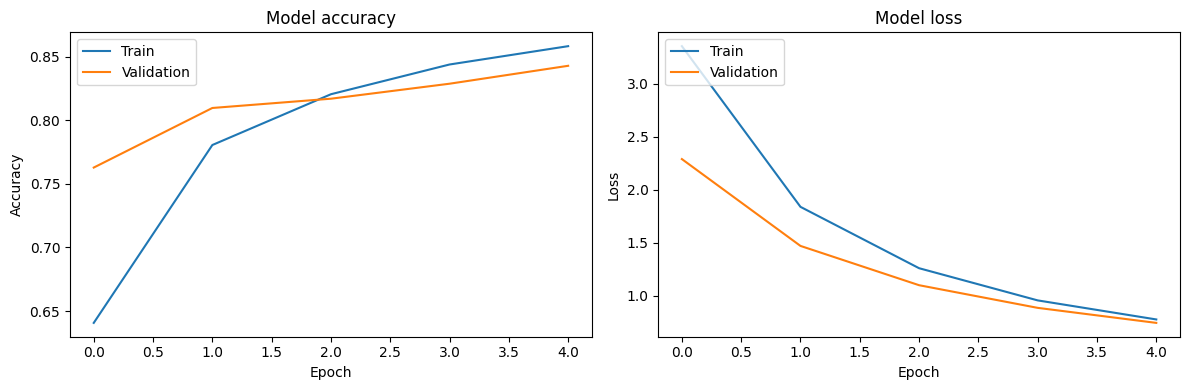

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values for CNN
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [ ]:
#loading test data
import os

def load_data(directory):
    reviews = []
    sentiments = []

    for sentiment in ['pos', 'neg']:
        dir_name = os.path.join(directory, sentiment)
        for fname in os.listdir(dir_name):
            if fname.endswith('.txt'):
                with open(os.path.join(dir_name, fname), encoding='utf-8') as f:
                    reviews.append(f.read())
                if sentiment == 'pos':
                    sentiments.append(1)
                else:
                    sentiments.append(0)

    return pd.DataFrame({'review': reviews, 'sentiment': sentiments})

# Adjust the path according to your dataset's structure
test_data = load_data('aclImdb/test')

data_df.head()

,review,sentiment,tokens,tokens_int,padded_sequences,sentiment_scores,compound_score
0,Bromwell High is a cartoon comedy. It ran at t...,1,"[bromwell, high, cartoon, comedy, ran, time, p...","[25513, 221, 655, 95, 1807, 6, 1473, 252, 31, ...","[25513, 221, 655, 95, 1807, 6, 1473, 252, 31, ...","{'neg': 0.044, 'neu': 0.916, 'pos': 0.039, 'co...",-0.1759
1,Homelessness (or Houselessness as George Carli...,1,"[homelessness, houselessness, george, carlin, ...","[24181, 53834, 551, 11362, 3090, 665, 47, 189,...","[24181, 53834, 551, 11362, 3090, 665, 47, 189,...","{'neg': 0.111, 'neu': 0.739, 'pos': 0.151, 'co...",0.9688
2,Brilliant over-acting by Lesley Ann Warren. Be...,1,"[brilliant, lesley, ann, warren, best, dramati...","[394, 13883, 1876, 3886, 45, 808, 13600, 471, ...","[394, 13883, 1876, 3886, 45, 808, 13600, 471, ...","{'neg': 0.078, 'neu': 0.736, 'pos': 0.186, 'co...",0.9657
3,This is easily the most underrated film inn th...,1,"[easily, underrated, film, inn, brook, cannon,...","[575, 1885, 3, 10676, 2125, 3916, 149, 2579, 5...","[575, 1885, 3, 10676, 2125, 3916, 149, 2579, 5...","{'neg': 0.02, 'neu': 0.759, 'pos': 0.221, 'com...",0.9825
4,This is not the typical Mel Brooks film. It wa...,1,"[typical, mel, brook, film, much, le, slapstic...","[627, 2931, 2125, 3, 19, 209, 2085, 2, 71, 40,...","[627, 2931, 2125, 3, 19, 209, 2085, 2, 71, 40,...","{'neg': 0.012, 'neu': 0.809, 'pos': 0.179, 'co...",0.9731


In [ ]:
#tokenizing test data
test_data['tokens'] = test_data['review'].apply(tokenize_and_normalize)
data_df.head()

,review,sentiment,tokens,tokens_int,padded_sequences,sentiment_scores,compound_score
0,Bromwell High is a cartoon comedy. It ran at t...,1,"[bromwell, high, cartoon, comedy, ran, time, p...","[25513, 221, 655, 95, 1807, 6, 1473, 252, 31, ...","[25513, 221, 655, 95, 1807, 6, 1473, 252, 31, ...","{'neg': 0.044, 'neu': 0.916, 'pos': 0.039, 'co...",-0.1759
1,Homelessness (or Houselessness as George Carli...,1,"[homelessness, houselessness, george, carlin, ...","[24181, 53834, 551, 11362, 3090, 665, 47, 189,...","[24181, 53834, 551, 11362, 3090, 665, 47, 189,...","{'neg': 0.111, 'neu': 0.739, 'pos': 0.151, 'co...",0.9688
2,Brilliant over-acting by Lesley Ann Warren. Be...,1,"[brilliant, lesley, ann, warren, best, dramati...","[394, 13883, 1876, 3886, 45, 808, 13600, 471, ...","[394, 13883, 1876, 3886, 45, 808, 13600, 471, ...","{'neg': 0.078, 'neu': 0.736, 'pos': 0.186, 'co...",0.9657
3,This is easily the most underrated film inn th...,1,"[easily, underrated, film, inn, brook, cannon,...","[575, 1885, 3, 10676, 2125, 3916, 149, 2579, 5...","[575, 1885, 3, 10676, 2125, 3916, 149, 2579, 5...","{'neg': 0.02, 'neu': 0.759, 'pos': 0.221, 'com...",0.9825
4,This is not the typical Mel Brooks film. It wa...,1,"[typical, mel, brook, film, much, le, slapstic...","[627, 2931, 2125, 3, 19, 209, 2085, 2, 71, 40,...","[627, 2931, 2125, 3, 19, 209, 2085, 2, 71, 40,...","{'neg': 0.012, 'neu': 0.809, 'pos': 0.179, 'co...",0.9731


In [ ]:
#removing sttop words from test dataa:

test_data['tokens'] = test_data['tokens'].apply(remove_stopwords)
data_df.head()

,review,sentiment,tokens,tokens_int,padded_sequences,sentiment_scores,compound_score
0,Bromwell High is a cartoon comedy. It ran at t...,1,"[bromwell, high, cartoon, comedy, ran, time, p...","[25513, 221, 655, 95, 1807, 6, 1473, 252, 31, ...","[25513, 221, 655, 95, 1807, 6, 1473, 252, 31, ...","{'neg': 0.044, 'neu': 0.916, 'pos': 0.039, 'co...",-0.1759
1,Homelessness (or Houselessness as George Carli...,1,"[homelessness, houselessness, george, carlin, ...","[24181, 53834, 551, 11362, 3090, 665, 47, 189,...","[24181, 53834, 551, 11362, 3090, 665, 47, 189,...","{'neg': 0.111, 'neu': 0.739, 'pos': 0.151, 'co...",0.9688
2,Brilliant over-acting by Lesley Ann Warren. Be...,1,"[brilliant, lesley, ann, warren, best, dramati...","[394, 13883, 1876, 3886, 45, 808, 13600, 471, ...","[394, 13883, 1876, 3886, 45, 808, 13600, 471, ...","{'neg': 0.078, 'neu': 0.736, 'pos': 0.186, 'co...",0.9657
3,This is easily the most underrated film inn th...,1,"[easily, underrated, film, inn, brook, cannon,...","[575, 1885, 3, 10676, 2125, 3916, 149, 2579, 5...","[575, 1885, 3, 10676, 2125, 3916, 149, 2579, 5...","{'neg': 0.02, 'neu': 0.759, 'pos': 0.221, 'com...",0.9825
4,This is not the typical Mel Brooks film. It wa...,1,"[typical, mel, brook, film, much, le, slapstic...","[627, 2931, 2125, 3, 19, 209, 2085, 2, 71, 40,...","[627, 2931, 2125, 3, 19, 209, 2085, 2, 71, 40,...","{'neg': 0.012, 'neu': 0.809, 'pos': 0.179, 'co...",0.9731


In [ ]:
#lemmatizing test daataset:

test_data['tokens'] = test_data['tokens'].apply(lemmatize)
data_df.head()

,review,sentiment,tokens,tokens_int,padded_sequences,sentiment_scores,compound_score
0,Bromwell High is a cartoon comedy. It ran at t...,1,"[bromwell, high, cartoon, comedy, ran, time, p...","[25513, 221, 655, 95, 1807, 6, 1473, 252, 31, ...","[25513, 221, 655, 95, 1807, 6, 1473, 252, 31, ...","{'neg': 0.044, 'neu': 0.916, 'pos': 0.039, 'co...",-0.1759
1,Homelessness (or Houselessness as George Carli...,1,"[homelessness, houselessness, george, carlin, ...","[24181, 53834, 551, 11362, 3090, 665, 47, 189,...","[24181, 53834, 551, 11362, 3090, 665, 47, 189,...","{'neg': 0.111, 'neu': 0.739, 'pos': 0.151, 'co...",0.9688
2,Brilliant over-acting by Lesley Ann Warren. Be...,1,"[brilliant, lesley, ann, warren, best, dramati...","[394, 13883, 1876, 3886, 45, 808, 13600, 471, ...","[394, 13883, 1876, 3886, 45, 808, 13600, 471, ...","{'neg': 0.078, 'neu': 0.736, 'pos': 0.186, 'co...",0.9657
3,This is easily the most underrated film inn th...,1,"[easily, underrated, film, inn, brook, cannon,...","[575, 1885, 3, 10676, 2125, 3916, 149, 2579, 5...","[575, 1885, 3, 10676, 2125, 3916, 149, 2579, 5...","{'neg': 0.02, 'neu': 0.759, 'pos': 0.221, 'com...",0.9825
4,This is not the typical Mel Brooks film. It wa...,1,"[typical, mel, brook, film, much, le, slapstic...","[627, 2931, 2125, 3, 19, 209, 2085, 2, 71, 40,...","[627, 2931, 2125, 3, 19, 209, 2085, 2, 71, 40,...","{'neg': 0.012, 'neu': 0.809, 'pos': 0.179, 'co...",0.9731


In [ ]:
#handling negations fir test dataset:

test_data['tokens'] = test_data['tokens'].apply(handle_negation)
data_df.head()

,review,sentiment,tokens,tokens_int,padded_sequences,sentiment_scores,compound_score
0,Bromwell High is a cartoon comedy. It ran at t...,1,"[bromwell, high, cartoon, comedy, ran, time, p...","[25513, 221, 655, 95, 1807, 6, 1473, 252, 31, ...","[25513, 221, 655, 95, 1807, 6, 1473, 252, 31, ...","{'neg': 0.044, 'neu': 0.916, 'pos': 0.039, 'co...",-0.1759
1,Homelessness (or Houselessness as George Carli...,1,"[homelessness, houselessness, george, carlin, ...","[24181, 53834, 551, 11362, 3090, 665, 47, 189,...","[24181, 53834, 551, 11362, 3090, 665, 47, 189,...","{'neg': 0.111, 'neu': 0.739, 'pos': 0.151, 'co...",0.9688
2,Brilliant over-acting by Lesley Ann Warren. Be...,1,"[brilliant, lesley, ann, warren, best, dramati...","[394, 13883, 1876, 3886, 45, 808, 13600, 471, ...","[394, 13883, 1876, 3886, 45, 808, 13600, 471, ...","{'neg': 0.078, 'neu': 0.736, 'pos': 0.186, 'co...",0.9657
3,This is easily the most underrated film inn th...,1,"[easily, underrated, film, inn, brook, cannon,...","[575, 1885, 3, 10676, 2125, 3916, 149, 2579, 5...","[575, 1885, 3, 10676, 2125, 3916, 149, 2579, 5...","{'neg': 0.02, 'neu': 0.759, 'pos': 0.221, 'com...",0.9825
4,This is not the typical Mel Brooks film. It wa...,1,"[typical, mel, brook, film, much, le, slapstic...","[627, 2931, 2125, 3, 19, 209, 2085, 2, 71, 40,...","[627, 2931, 2125, 3, 19, 209, 2085, 2, 71, 40,...","{'neg': 0.012, 'neu': 0.809, 'pos': 0.179, 'co...",0.9731


In [ ]:
#cobverting tokens to integers for test dataset:

test_data['tokens_int'] = test_data['tokens'].apply(lambda x: tokenizer.texts_to_sequences([x])[0])
data_df.head()

,review,sentiment,tokens,tokens_int,padded_sequences,sentiment_scores,compound_score
0,Bromwell High is a cartoon comedy. It ran at t...,1,"[bromwell, high, cartoon, comedy, ran, time, p...","[25513, 221, 655, 95, 1807, 6, 1473, 252, 31, ...","[25513, 221, 655, 95, 1807, 6, 1473, 252, 31, ...","{'neg': 0.044, 'neu': 0.916, 'pos': 0.039, 'co...",-0.1759
1,Homelessness (or Houselessness as George Carli...,1,"[homelessness, houselessness, george, carlin, ...","[24181, 53834, 551, 11362, 3090, 665, 47, 189,...","[24181, 53834, 551, 11362, 3090, 665, 47, 189,...","{'neg': 0.111, 'neu': 0.739, 'pos': 0.151, 'co...",0.9688
2,Brilliant over-acting by Lesley Ann Warren. Be...,1,"[brilliant, lesley, ann, warren, best, dramati...","[394, 13883, 1876, 3886, 45, 808, 13600, 471, ...","[394, 13883, 1876, 3886, 45, 808, 13600, 471, ...","{'neg': 0.078, 'neu': 0.736, 'pos': 0.186, 'co...",0.9657
3,This is easily the most underrated film inn th...,1,"[easily, underrated, film, inn, brook, cannon,...","[575, 1885, 3, 10676, 2125, 3916, 149, 2579, 5...","[575, 1885, 3, 10676, 2125, 3916, 149, 2579, 5...","{'neg': 0.02, 'neu': 0.759, 'pos': 0.221, 'com...",0.9825
4,This is not the typical Mel Brooks film. It wa...,1,"[typical, mel, brook, film, much, le, slapstic...","[627, 2931, 2125, 3, 19, 209, 2085, 2, 71, 40,...","[627, 2931, 2125, 3, 19, 209, 2085, 2, 71, 40,...","{'neg': 0.012, 'neu': 0.809, 'pos': 0.179, 'co...",0.9731


In [ ]:
#padding sequences for test dataset:

padded_test_sequences = pad_sequences(test_data['tokens_int'], maxlen=max_sequence_length, padding='post')
data_df.head()

,review,sentiment,tokens,tokens_int,padded_sequences,sentiment_scores,compound_score
0,Bromwell High is a cartoon comedy. It ran at t...,1,"[bromwell, high, cartoon, comedy, ran, time, p...","[25513, 221, 655, 95, 1807, 6, 1473, 252, 31, ...","[25513, 221, 655, 95, 1807, 6, 1473, 252, 31, ...","{'neg': 0.044, 'neu': 0.916, 'pos': 0.039, 'co...",-0.1759
1,Homelessness (or Houselessness as George Carli...,1,"[homelessness, houselessness, george, carlin, ...","[24181, 53834, 551, 11362, 3090, 665, 47, 189,...","[24181, 53834, 551, 11362, 3090, 665, 47, 189,...","{'neg': 0.111, 'neu': 0.739, 'pos': 0.151, 'co...",0.9688
2,Brilliant over-acting by Lesley Ann Warren. Be...,1,"[brilliant, lesley, ann, warren, best, dramati...","[394, 13883, 1876, 3886, 45, 808, 13600, 471, ...","[394, 13883, 1876, 3886, 45, 808, 13600, 471, ...","{'neg': 0.078, 'neu': 0.736, 'pos': 0.186, 'co...",0.9657
3,This is easily the most underrated film inn th...,1,"[easily, underrated, film, inn, brook, cannon,...","[575, 1885, 3, 10676, 2125, 3916, 149, 2579, 5...","[575, 1885, 3, 10676, 2125, 3916, 149, 2579, 5...","{'neg': 0.02, 'neu': 0.759, 'pos': 0.221, 'com...",0.9825
4,This is not the typical Mel Brooks film. It wa...,1,"[typical, mel, brook, film, much, le, slapstic...","[627, 2931, 2125, 3, 19, 209, 2085, 2, 71, 40,...","[627, 2931, 2125, 3, 19, 209, 2085, 2, 71, 40,...","{'neg': 0.012, 'neu': 0.809, 'pos': 0.179, 'co...",0.9731


In [ ]:
#extracting compound scores for test dataset:

test_data['sentiment_scores'] = test_data['review'].apply(lambda x: sia.polarity_scores(x))
test_data['compound_score'] = test_data['sentiment_scores'].apply(lambda x: x['compound'])
data_df.head()

,review,sentiment,tokens,tokens_int,padded_sequences,sentiment_scores,compound_score
0,Bromwell High is a cartoon comedy. It ran at t...,1,"[bromwell, high, cartoon, comedy, ran, time, p...","[25513, 221, 655, 95, 1807, 6, 1473, 252, 31, ...","[25513, 221, 655, 95, 1807, 6, 1473, 252, 31, ...","{'neg': 0.044, 'neu': 0.916, 'pos': 0.039, 'co...",-0.1759
1,Homelessness (or Houselessness as George Carli...,1,"[homelessness, houselessness, george, carlin, ...","[24181, 53834, 551, 11362, 3090, 665, 47, 189,...","[24181, 53834, 551, 11362, 3090, 665, 47, 189,...","{'neg': 0.111, 'neu': 0.739, 'pos': 0.151, 'co...",0.9688
2,Brilliant over-acting by Lesley Ann Warren. Be...,1,"[brilliant, lesley, ann, warren, best, dramati...","[394, 13883, 1876, 3886, 45, 808, 13600, 471, ...","[394, 13883, 1876, 3886, 45, 808, 13600, 471, ...","{'neg': 0.078, 'neu': 0.736, 'pos': 0.186, 'co...",0.9657
3,This is easily the most underrated film inn th...,1,"[easily, underrated, film, inn, brook, cannon,...","[575, 1885, 3, 10676, 2125, 3916, 149, 2579, 5...","[575, 1885, 3, 10676, 2125, 3916, 149, 2579, 5...","{'neg': 0.02, 'neu': 0.759, 'pos': 0.221, 'com...",0.9825
4,This is not the typical Mel Brooks film. It wa...,1,"[typical, mel, brook, film, much, le, slapstic...","[627, 2931, 2125, 3, 19, 209, 2085, 2, 71, 40,...","[627, 2931, 2125, 3, 19, 209, 2085, 2, 71, 40,...","{'neg': 0.012, 'neu': 0.809, 'pos': 0.179, 'co...",0.9731


In [ ]:
#Extract Labels and Data

X_test = np.array(padded_test_sequences)
y_test = test_data['sentiment'].values

In [ ]:
from tensorflow.keras.models import save_model

# Replace 'model' with the name of your model
model.save('best_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
#Load Your Trained Model

from tensorflow.keras.models import load_model

model = load_model('/content/best_model.h5')

In [ ]:
# Evaluate the model on the test data
loss, accuracy, model_precision, model_recall = model.evaluate(X_test, y_test, batch_size=32)

# Make predictions on the test data
predictions = model.predict(X_test)
binary_predictions = (predictions > 0.5).astype(int)

from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate precision, recall, and f1-score using sklearn
sklearn_precision = precision_score(y_test, binary_predictions)
sklearn_recall = recall_score(y_test, binary_predictions)
sklearn_f1_score = f1_score(y_test, binary_predictions)

print("Metrics from model evaluation:")
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')
print(f'Model Precision: {model_precision}')
print(f'Model Recall: {model_recall}')
print(f"F1 Score: {sklearn_f1_score}")

NameError: ignored